<figure>
<IMG SRC="../../lectures/images/PhysicsLogo.jpg" WIDTH=100 ALIGN="right">
</figure>
# [Physics 411](http://jklymak.github.io/Phy411/) Time Series Analysis
*Jody Klymak*


# Assignment 2

## Q1: Show that the correlation co-efficient is indeed related to the fraction of varaince explained by a linear dependence.

**1** To start, make a $N(0,1)$ random variable $x$, with 200,000 entries.  Then make a linearly dependent variable $y_i= a x_i + n_i$, where a is some amplitude, and $n_i$ is a random noise varaible.  Assume that $n_i$ is distributed as $N(0,n)$, where $n$ is the noise level.

Calculate the correlation co-efficient $r_{xy}$ between $x$ and $y$ for 40 different values of $n$, logarithmically spaced between 0.01 and 100. (hint use `np.logspace`).  

Plot $r_{xy}$ versus the inverse of the noise $n$ normalized by the standard devaition of the signal $ax_i$: $\frac{a s_x}{n}$   You may want to use `ax.loglog` to visualize the orders of magnitude.  

Comment on the resulting comparison.

#### Coding hint:

You are going to need to generate 40 realizations of the random process, so do this in a `for`-loop, and save the results in an array that you initialize before the for-loop:
```python
r = np.zeros(40)
for ind,n in enumerate(noisevalues):
  # make your random variable
  ...
  # calculate r
  r[ind]=...
```
<hr>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
%matplotlib inline

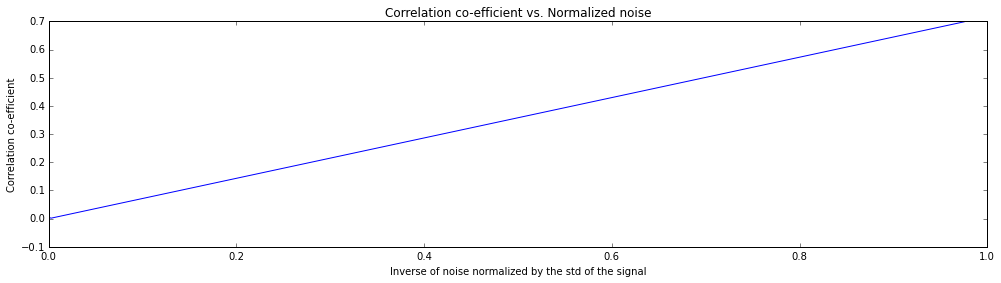

In [20]:
# constants
N = 200000
a = 1

def makePlot(a,N):
    # make 40 noise values spaced logarithmically between 0.01 and 100
    noisevalues = np.logspace(0.01,100.,40)

    r = np.zeros(40)
    for ind,n in enumerate(noisevalues):
        # make x, an N(0,1) random variable with 200,000 entries
        x = np.random.normal(0.,1.,N)
        x = x - np.mean(x)

        # capture noise for this noise level
        noise = np.random.normal(0.,n,N)

        # make y linearly dependent to x: y_i = a*x_i + n_i
        y = a*x + noise
        y = y - np.mean(y)

        # standard deviations of x and y 
        sx = np.std(x)
        sy = np.std(y)

        # correlation coefficient with one degree of freedom
        r[ind] = np.sum(x*y)/sx/sy/(N-1)

      
    
    return r,noisevalues,sx
    
r,noisevalues,sx = makePlot(a,N)

# Create the plot
plt.figure(figsize=(14,4))      # Make figure
gs=gridspec.GridSpec(1,1)       # Set up the layout
ax=plt.subplot(gs[0:1])         # select the whole grid to plot in
ax.plot(a*sx/noisevalues,r)     # plot
#ax.loglog()
ax.set_xlabel('Inverse of noise normalized by the std of the signal')
ax.set_ylabel('Correlation co-efficient')
ax.set_title('Correlation co-efficient vs. Normalized noise')

# tighten the layout a bit
plt.tight_layout()

The above plot shows that the correlation co-efficient is linearly related to the inverse of the noise normalized by the standard deviation of the signal. From this, we can infer that the correlation co-efficient is thereby linearly related to the fraction of variance. 

**2** Repeat the above, but with a different value of $a$.  Comment on how (and why) $a$ changes the value of $r_{xy}$.  

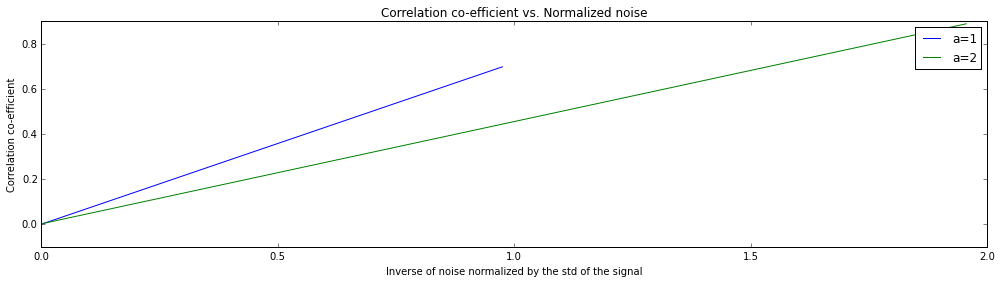

In [21]:
a2 = 2 # a new value

r2,noisevalues2,sx2 = makePlot(a2,N)

# Create the plot
plt.figure(figsize=(14,4))      # Make figure
gs=gridspec.GridSpec(1,1)       # Set up the layout
ax=plt.subplot(gs[0:1])         # select the whole grid to plot in
ax.plot(a*sx/noisevalues,r,label='a=1')     # plot
ax.plot(a2*sx2/noisevalues2,r2,label='a=2')
#ax.loglog()
ax.set_xlabel('Inverse of noise normalized by the std of the signal')
ax.set_ylabel('Correlation co-efficient')
ax.set_title('Correlation co-efficient vs. Normalized noise')
ax.legend()

# tighten the layout a bit
plt.tight_layout()

From the equation y_i=ax_i+n_i we see that a is the slope of a y vs. x graph. The correlation co-efficient is proportional to the sum of the product of x_i and y_i (each subtracted by their means) divided by the product of their standard deviations. Thus, the correlation co-efficient is also proportional to some multiple of a, as seen by the changed graph above.

## Q2: Monte Carlo on slopes and test versus student-t distribution

**1** We stated without proof that the slope $b$ of a linear fit of $y$ to $x$ is distributed as a student-t distribution with $N-2$ degrees of freedom, with a standard devaition given by the standard deviation of $y$ around the fit model $\tilde{y}$.   Lets test that emperically using a Monte Carlo technique.  

First create an independet variable $x$ from 10 points from an $N(0,1)$ distribution.

Next, using $n=1.0$, and $a=1.0$ create the dependent variables $y_i=a x_i + n_i$ where $n_i$ are drawn from the $N(0,n)$ distribution.  Calculate the slope $b$.  

Do this 10000 times, and make a histogram of the resulting fits $b$.  Also histogram $s_{y|x}$ as defined in the notes.

Comment on the histigrams

<hr>

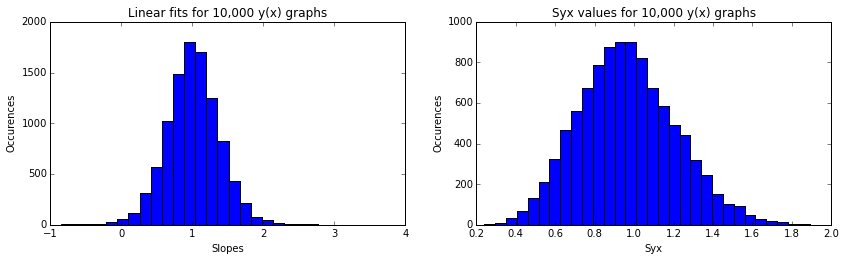

In [22]:
# Constants
N = 10
a = 1.0
n = 1.0
Nexps = 10000

def getData(N,a,n,Nexps):
    # Collect 10000 slopes
    b = np.zeros(Nexps)
    syx = np.zeros(Nexps)
    for i in range(Nexps):
        # make independent variable x, an N(0,1) random variable with 10 entries
        x = np.random.normal(0.,1.,N)

        # make noise values
        noise = np.random.normal(0.,n,N)

        # make dependent variable y
        y = a*x + noise

        # calculate the slope
        slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        b[i] = slope

        # calculate sample standard deviation of the observed values about the prediction
        b_new = np.sum(x*y)-N*np.mean(x)*np.mean(y)
        b_new = b_new/(np.sum(x**2)-N*np.mean(x)**2)
        a_new = np.mean(y)-slope*np.mean(x)
        yhat = b_new*x+a_new
        syx[i]=np.sqrt(np.sum((y-yhat)**2)/(N-2))
        
    return b,syx

b,syx = getData(N,a,n,Nexps)
    
# Setup output
plt.figure(figsize=(14,8))        # Make figure
gs=gridspec.GridSpec(2,2)        # Set up the layout

# Make b histogram
ax1 = plt.subplot(gs[0])
ax1.hist(b,30)
ax1.set_xlabel('Slopes')
ax1.set_ylabel('Occurences')
ax1.set_title('Linear fits for 10,000 y(x) graphs')

# Make syx histogram
ax2 = plt.subplot(gs[1])
ax2.hist(syx,30)
ax2.set_xlabel('Syx')
ax2.set_ylabel('Occurences')
ax2.set_title('Syx values for 10,000 y(x) graphs')


YOUR ANSWER HERE

**2** Assuming $s_{y|x}=1.$ (which is the same as our value of $n$), plot the student-t probability density function on the histogram of b and show that they compare favorably (if they don't you might need to check your work!)

<hr>

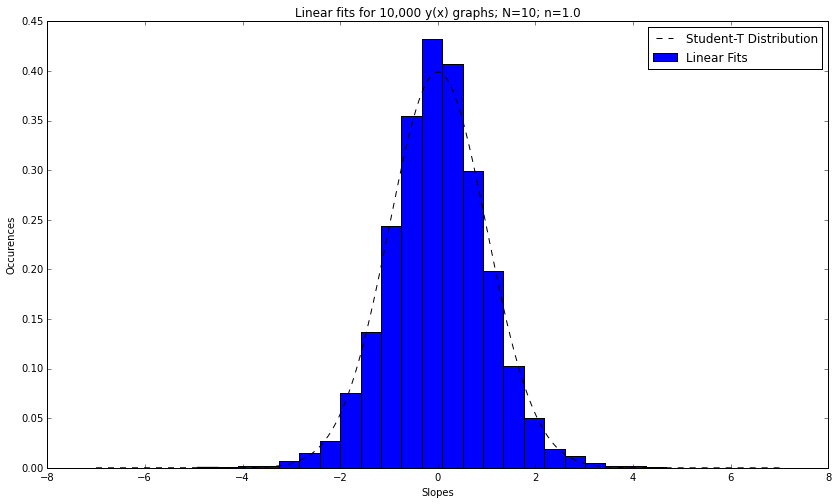

In [23]:
# Get student-t pdf
x = np.linspace(-7.,7.,1000)
y=stats.t.pdf(x,Nexps-2)

# Setup graph window
plt.figure(figsize=(14,8))        # Make figure
gs=gridspec.GridSpec(1,1)        # Set up the layout

b_norm = (b-np.mean(b))/np.std(b)

# Make b histogram
ax = plt.subplot(gs[0])
ax.hist(b_norm,30,label='Linear Fits',normed=True)
ax.set_xlabel('Slopes')
ax.set_ylabel('Occurences')
ax.set_title('Linear fits for 10,000 y(x) graphs; N=10; n=1.0')

# Add student-t pdf to plot
ax.plot(x,y,'k--',label='Student-T Distribution')
#ax.set_ylim([0.,0.4])

ax.legend()



**3** Do the same procedure for a different number of data points, and a different value for the noise level $n$.  Remember to scale your theoretical histogram by the new expected value of $s_{y|x}$.

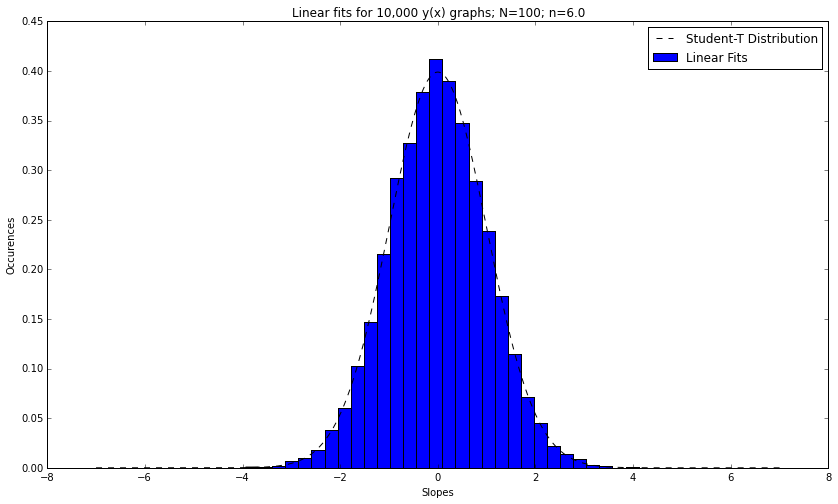

In [24]:
# new number of data points and value for noise level
N = 100
n = 6.0
b,syx = getData(N,a,n,Nexps)

# Setup graph window
plt.figure(figsize=(14,8))        # Make figure
gs=gridspec.GridSpec(1,1)        # Set up the layout

b_norm = (b-np.mean(b))/np.std(b)

# Make b histogram
ax = plt.subplot(gs[0])
ax.hist(b_norm,30,label='Linear Fits',normed=True)
ax.set_xlabel('Slopes')
ax.set_ylabel('Occurences')
ax.set_title('Linear fits for 10,000 y(x) graphs; N=100; n=6.0')

# Add student-t pdf to plot
ax.plot(x,y,'k--',label='Student-T Distribution')
#ax.set_ylim([0.,0.4])

ax.legend()

## Q3: Linear comparison of Deep Cove data to James Bay temperature data

Data was collected from a number of weather stations by the Victoria Weather Network.  In the file below is hourly temperature data (in degrees Celsius) and we will consider two of the stations in that file:

In [25]:
# Load the data:

hourdata=np.genfromtxt('http://web.uvic.ca/~jklymak/Phy411/Data/AllHourly.txt')[[6,28],2:]
dc = hourdata[0,:]
jb=hourdata[1,:]
dcc=dc[np.isfinite(dc+jb)]
jb = jb[np.isfinite(dc+jb)]
dc=dcc

**1** Make a scatterplot of James Bay versus Deep Cove.

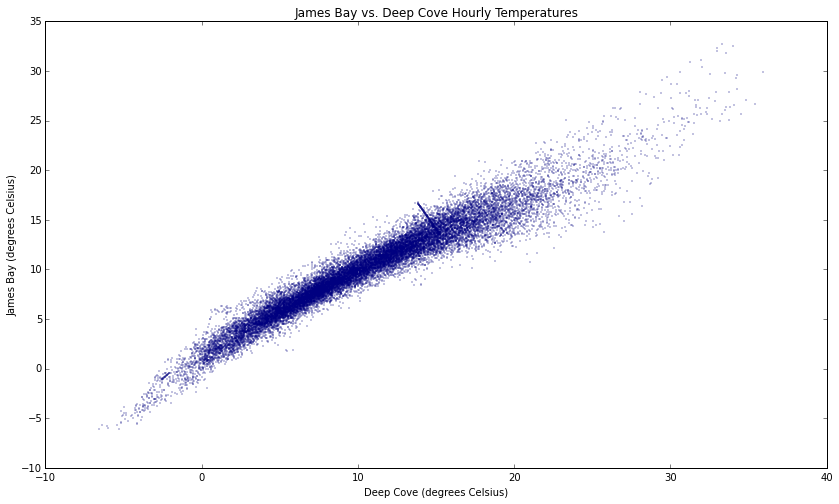

In [26]:
def makePlot(dc,jb):

    # Setup graph window
    plt.figure(figsize=(14,8))        # Make figure
    gs=gridspec.GridSpec(1,1)         # Set up the layout
    ax = plt.subplot(gs[0])

    # Plot the data
    ax.plot(dc,jb,'.',markersize=1,color='navy',label='Data')

    # Label it
    ax.set_xlabel('Deep Cove (degrees Celsius)')
    ax.set_ylabel('James Bay (degrees Celsius)')
    ax.set_title('James Bay vs. Deep Cove Hourly Temperatures')
    
    return ax

makePlot(dc,jb)

**2** Compute the linear Correlation Co-efficient (without a canned routine)

In [27]:
# Compute number of data points
N = len(dc)

# Compute means
dcm = np.mean(dc)
jbm = np.mean(jb)

# Compute standard deviations
sdc = np.std(dc)
sjb = np.std(jb)

# Compute linear correlation co-efficient
c = np.sum((dc-dcm)*(jb-jbm))/sdc/sjb/(N-1)
print 'Linear Correlation Co-efficient: ',c

Linear Correlation Co-efficient:  0.965414194534


**3** Fit a straight line to the James Bay data as a fucntion of the Deep Cove data, and add to the scatter plot made above.  Comment on the fit.

<hr>

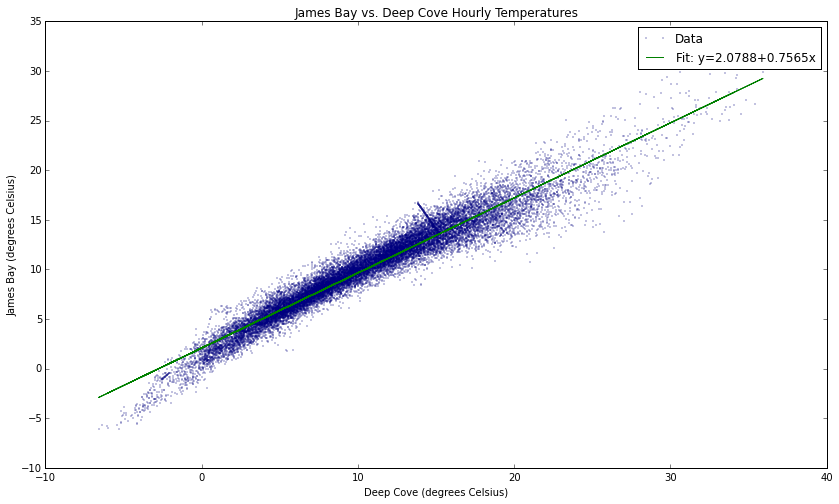

In [28]:
ax = makePlot(dc,jb)

# Get the linear fit
b = np.sum(dc*jb)-N*np.mean(dc)*np.mean(jb)
b = b/(np.sum(dc**2)-N*np.mean(dc)**2)
a = np.mean(jb)-b*np.mean(dc)
jbhat=b*dc+a

# Plot the linear fit
ax.plot(dc,jbhat,'-',color='green',label='Fit: y=%1.4f+%1.4fx'%(a,b))
    
ax.legend()

The straight line appears to fit well with the collected data. It is the best in the middle area of the plot which has more data points, but doesn't fit very well in the lower temperatures (from about 0 degrees and below). Perhaps this means winters temperatures are less predictable than in the milder seasons.

**4** Add the confidence intervals to your fit, and comment.

Slope b is between 0.753791 and 0.759110 with 95% probability


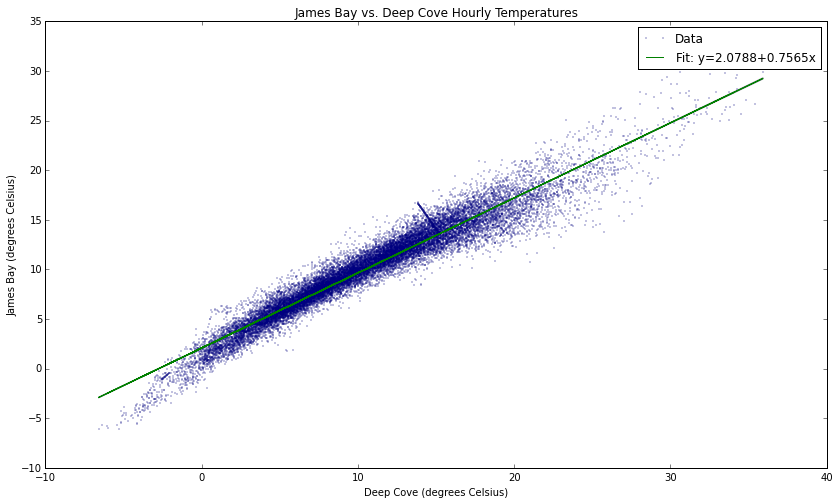

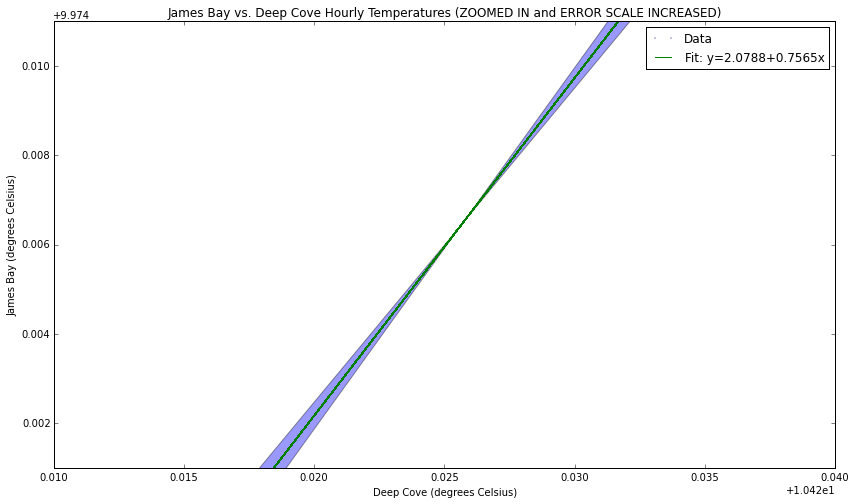

In [64]:
ax = makePlot(dc,jb)

# Get the linear fit
b = np.sum(dc*jb)-N*np.mean(dc)*np.mean(jb)
b = b/(np.sum(dc**2)-N*np.mean(dc)**2)
a = np.mean(jb)-b*np.mean(dc)
jbhat=b*dc+a

# Plot the linear fit
ax.plot(dc,jbhat,'-',color='green',label='Fit: y=%1.4f+%1.4fx'%(a,b))
    
ax.legend()

# get the error bounds...
syx=np.sqrt(np.sum((jb-jbhat)**2)/(N-2))

bdn,bup=stats.t.interval(0.95,df=N-2,scale=syx)
bb=np.array([bdn,bup])
bb=bb/np.sqrt(np.sum((dc-np.mean(dc))**2))
print 'Slope b is between %f and %f with 95%% probability'%(b+bb[0],b+bb[1])
dc_sorted=np.sort(dc)
jbhathigh=(b+bb[1])*(dc_sorted-np.mean(dc))+np.mean(jb)
jbhatlow=(b+bb[0])*(dc_sorted-np.mean(dc))+np.mean(jb)
ax.fill_between(dc_sorted,jbhathigh,jbhatlow,alpha=0.4)

# Plot a zoomed-in verson
ax = makePlot(dc,jb)
b = np.sum(dc*jb)-N*np.mean(dc)*np.mean(jb)
b = b/(np.sum(dc**2)-N*np.mean(dc)**2)
a = np.mean(jb)-b*np.mean(dc)
jbhat=b*dc+a
ax.plot(dc,jbhat,'-',color='green',label='Fit: y=%1.4f+%1.4fx'%(a,b))
ax.legend()
syx=np.sqrt(np.sum((jb-jbhat)**2)/(N-2))
bdn,bup=stats.t.interval(0.95,df=N-2,scale=syx*20)
bb=np.array([bdn,bup])
bb=bb/np.sqrt(np.sum((dc-np.mean(dc))**2))
dc_sorted=np.sort(dc)
jbhathigh=(b+bb[1])*(dc_sorted-np.mean(dc))+np.mean(jb)
jbhatlow=(b+bb[0])*(dc_sorted-np.mean(dc))+np.mean(jb)
ax.fill_between(dc_sorted,jbhathigh,jbhatlow,alpha=0.4)
ax.set_xlim([10.43,10.46])
ax.set_ylim([9.975,9.985])
ax.set_title('James Bay vs. Deep Cove Hourly Temperatures (ZOOMED IN and ERROR SCALE INCREASED)')

When the confidence intervals are added, the graph initially looks unchanged. However, if we zoom in on the graph and scale the value of syx by 20-times, we can see the confidence intervals in the linear fit. This tells us that the fit is very accurate, and in the first graph the confidence intervals are there but they are very small, meaning we are very confident with the linear fit.

**5** Note that we have assumed that the Deep Cove data is independent and that the James Bay data is dependent.  There is no reason to assume this!  Do the fit in the other direction, and compare the slopes.

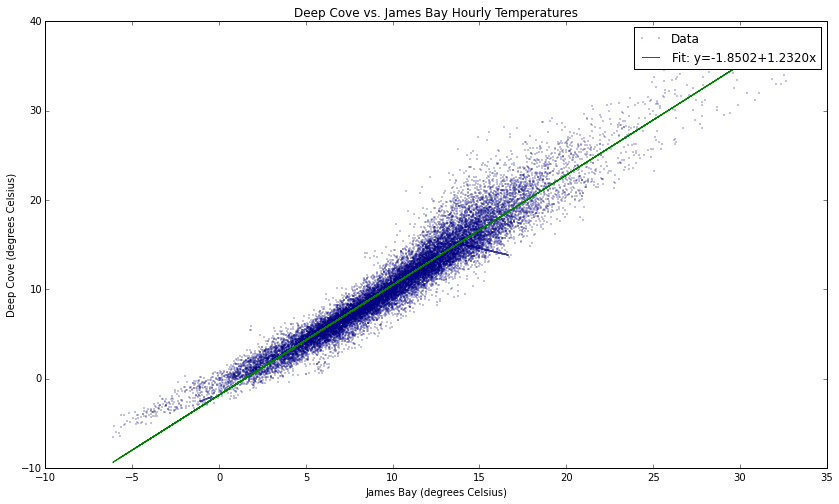

In [30]:
# Plot as before, switching independent and dependent variables
ax = makePlot(jb,dc)

# Fix the labels
ax.set_xlabel('James Bay (degrees Celsius)')
ax.set_ylabel('Deep Cove (degrees Celsius)')
ax.set_title('Deep Cove vs. James Bay Hourly Temperatures')

# Get the new linear fit
b = np.sum(jb*dc)-N*np.mean(jb)*np.mean(dc)
b = b/(np.sum(jb**2)-N*np.mean(jb)**2)
a = np.mean(dc)-b*np.mean(jb)
dchat=b*jb+a

# Plot the linear fit
ax.plot(jb,dchat,'-',color='green',label='Fit: y=%1.4f+%1.4fx'%(a,b))
    
ax.legend()

The slopes are approximately the inverses of each other. For James Bay vs. Deep Cove, the slope is 0.7565. The inverse of this is 1.3219, which is close to the slope of Deep Cove vs. James Bay (1.2320). As the data is taken from real-world research, rather than from theoretical probabilities, this small difference is expected.

**NOTE** There is a way to treat both axes independently called "Neutral Regression".  It is relatively simple, and involves normalizing the total distance of each point from the trend line. <a href="http://journals.ametsoc.org/doi/pdf/10.1175/1520-0426(1999)016%3C0876%3AAPFANR%3E2.0.CO%3B2">(Marsden 1999)</a>. This technique is strongly preferred if there is no reason to think that one data set is dependent on the other.  A caveat is that the data sets shoudl be normalized before fitting so that the "distance" has meaning.  